Importing all libraries that'll be required.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
%matplotlib inline


In [69]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [2]:
def plot_confusion_matrix(y, y_predict, t='Confusion Matrix'):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.heatmap(cm, annot=True, ax=ax, cmap='mako', fmt=',d').set_title(
        t, fontsize=12)
    # sns.color_palette("mako", as_cmap=True)
    ax.set_xlabel('Predicted labels', fontsize=10)
    ax.set_ylabel('True labels', fontsize=10)
    # ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    ax.yaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    plt.show()


In [3]:
# plot_confusion_matrix(y_test, y_pred, t='Confusion Matrix')

Importing data


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('train40Features.csv')
target = pd.read_csv('train.csv')

In [6]:
df.head()

,sex,age_approx,anatom_site_general_challenge,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,3,45.0,2,0.1024,9,8789.0625,84.667969,147,1435.546875,2.148438,...,1.835102,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426
1,2,45.0,7,0.1024,5,4882.8125,84.570312,88,859.375000,1.687500,...,1.301577,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091
2,2,50.0,3,0.1024,6,5859.3750,84.960938,100,976.562500,1.781250,...,1.475337,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386
3,2,45.0,2,0.1024,15,14648.4375,84.765625,210,2050.781250,2.640625,...,2.772424,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073
4,2,55.0,7,0.1024,6,5859.3750,84.667969,98,957.031250,1.765625,...,1.358362,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426


In [7]:
target.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [8]:
df.isnull().sum()

sex                              0
age_approx                       0
anatom_site_general_challenge    0
V1                               0
V2                               0
V3                               0
V4                               0
V5                               0
V6                               0
V7                               0
V8                               0
V9                               0
V10                              0
V11                              0
V12                              0
V13                              0
V14                              0
V15                              0
V16                              0
V17                              0
V18                              0
V19                              0
V20                              0
V21                              0
V22                              0
V23                              0
V24                              0
V25                              0
V26                 

In [9]:
for i in range(len(df.columns)):
    if df.iloc[:,i].isnull().sum():
        print(df.columns[i])

In [10]:
for i in range(len(target.columns)):
    if target.iloc[:, i].isnull().sum():
        print(target.columns[i], target.iloc[:, i].isnull().sum())


sex 65
age_approx 68
anatom_site_general_challenge 527


In [11]:
target['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

In [12]:
df.dtypes

sex                                int64
age_approx                       float64
anatom_site_general_challenge      int64
V1                               float64
V2                                 int64
V3                               float64
V4                               float64
V5                                 int64
V6                               float64
V7                               float64
V8                               float64
V9                               float64
V10                              float64
V11                              float64
V12                              float64
V13                              float64
V14                              float64
V15                              float64
V16                              float64
V17                                int64
V18                                int64
V19                              float64
V20                              float64
V21                              float64
V22             

In [13]:
#adding target column to our train dataset
df['target'] = target['target']

In [14]:
df.drop('V1',axis = 1, inplace = True) 

In [15]:
df.head()

,sex,age_approx,anatom_site_general_challenge,V2,V3,V4,V5,V6,V7,V8,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,3,45.0,2,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,...,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,0
1,2,45.0,7,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,...,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,0
2,2,50.0,3,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,...,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,0
3,2,45.0,2,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,...,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,0
4,2,55.0,7,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,...,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,0


In [16]:
columns = ['sex','age','anatomy','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34','V35','V36','target']
df.columns = columns
df.head()

,sex,age,anatomy,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,target
0,3,45.0,2,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,...,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,0
1,2,45.0,7,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,...,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,0
2,2,50.0,3,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,...,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,0
3,2,45.0,2,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,...,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,0
4,2,55.0,7,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,...,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,0


In [17]:
df.describe()

,sex,age,anatomy,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,target
count,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,...,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000
mean,2.513645,48.870016,5.065809,6.878404,6717.191085,84.370619,110.897543,1082.983816,1.866387,0.074047,...,1.415027,1.142590,0.408730,27.292585,1.264613,0.358829,0.129603,55.520107,0.431964,0.017630
std,0.503732,14.365592,1.698412,3.545849,3462.743538,0.905896,37.956843,370.672296,0.296538,0.001333,...,0.277098,0.409174,0.142931,8.152956,0.063238,0.164234,0.052083,3.343317,0.007983,0.131603
min,1.000000,0.000000,1.000000,2.000000,1953.125000,36.816406,28.000000,273.437500,1.218750,0.030560,...,1.000000,0.001356,0.000678,0.036049,1.021925,0.000345,0.000173,19.026307,0.423386,0.000000
25%,2.000000,40.000000,3.000000,5.000000,4882.812500,84.179688,88.000000,859.375000,1.687500,0.073587,...,1.250000,0.881356,0.315615,22.218097,1.225470,0.276963,0.099686,54.182975,0.426753,0.000000
50%,3.000000,50.000000,6.000000,6.000000,5859.375000,84.570312,101.000000,986.328125,1.789062,0.074213,...,1.375000,1.137488,0.397822,27.161390,1.256902,0.327407,0.120948,56.325112,0.430091,0.000000
75%,3.000000,60.000000,6.000000,8.000000,7812.500000,84.765625,121.000000,1181.640625,1.945312,0.074724,...,1.516667,1.352941,0.488091,31.581977,1.289378,0.387862,0.148933,57.774162,0.435042,0.000000
max,3.000000,90.000000,7.000000,41.000000,40039.062500,84.960938,520.000000,5078.125000,5.062500,0.076232,...,2.988475,4.560000,1.971525,84.905040,1.704702,1.000000,0.417250,63.625898,0.609033,1.000000


In [18]:
x= df[df['target'] == 1]

In [19]:
df['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [20]:
# yres=pd.DataFrame(df['target'])
# yres['target'].value_counts()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.25, random_state=4)


In [22]:
y_test.value_counts()


0    8123
1     159
Name: target, dtype: int64

In [23]:
y_train.value_counts()

0    24419
1      425
Name: target, dtype: int64

In [24]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9630524028012557


In [25]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[7967,  156],
       [ 150,    9]], dtype=int64)

In [26]:
# corr = df.corr()
# # corr
# corr.head()

In [27]:
# df['target'].value_counts()
# x = df.drop('target',axis = 1)


In [28]:
# x_train, x_test, y_train, y_test = train_test_split(x, df['target'], test_size=0.25, random_state=4)

In [29]:
x_train.shape

(24844, 39)

In [30]:
y_train.shape

(24844,)

In [31]:
x_test.shape

(8282, 39)

In [32]:
y_test.shape

(8282,)

In [33]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [34]:
# x_test[:,1][:10]

In [35]:
y_test.value_counts()

0    8123
1     159
Name: target, dtype: int64

In [36]:
#DECISION TREE MODEL
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(splitter='best')

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9620864525476938


In [37]:
y_pred.shape

(8282,)

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[7956,  167],
       [ 147,   12]], dtype=int64)

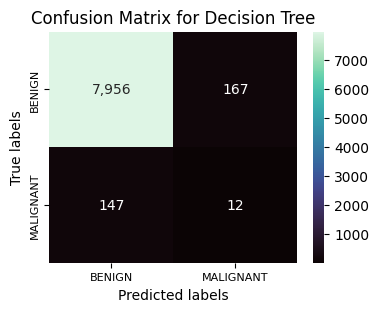

In [39]:
plot_confusion_matrix(y_test,y_pred, 'Confusion Matrix for Decision Tree')

In [42]:
# plot_roc_curve(y_test, y_pred)


In [43]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=4)  # metric='minkowski', p=2
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9803187635836754


In [44]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[8119,    4],
       [ 159,    0]], dtype=int64)

In [76]:
# plot_roc_curve(y_test, y_pred)


NameError: name 'plot_roc_curve' is not defined

In [45]:
#SVM model
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9808017387104564


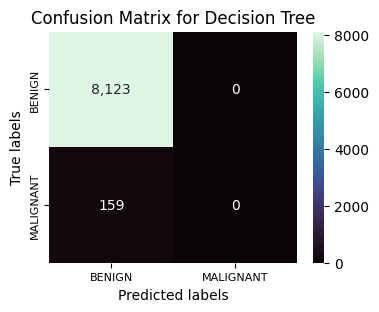

In [46]:
# cm = confusion_matrix(y_test,y_pred)
# cm
yhat = classifier.predict(x_test)
plot_confusion_matrix(y_test,yhat, 'Confusion Matrix for Decision Tree')

In [123]:
cm = confusion_matrix(y_test, yhat)
cm


array([[8133,    0],
       [ 149,    0]], dtype=int64)

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'ccp_alpha': [0.1, .01, .001, 0.05],
     #'max_depth': [50,70,100],
     'max_features': ['auto', 'sqrt']}
tree = DecisionTreeClassifier()

In [48]:
# Surpress warnings:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn


In [49]:
tree_cv= GridSearchCV(tree,parameters, cv=10)
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.05],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']})

In [50]:
print("Tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
accuracy : 0.9828932856397646


In [51]:
dtts= tree_cv.score(x_test,y_test)
dtts

0.9808017387104564

In [52]:
# tree= DecisionTreeClassifier(max_depth=100)
# tree.fit(x_train,y_train)
# print(tree.max_depth)
# tree_cv.predict(x_test)
#


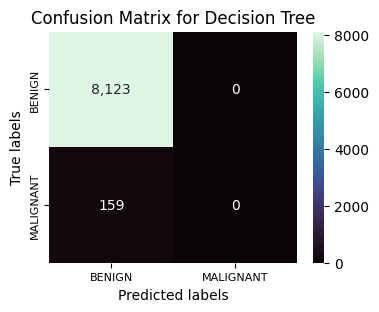

In [53]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat, 'Confusion Matrix for Decision Tree')

In [55]:
#
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
# param_grid = {
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [4, 5, 6, 7, 8],
#     'criterion': ['gini', 'entropy']
# } removed gridsearch for now, was taking too long


In [56]:
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# CV_rfc.best_params_

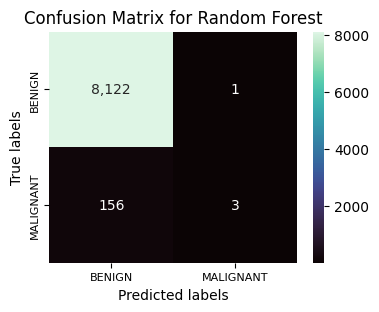

In [58]:
ypred= rfc.predict(x_test)
plot_confusion_matrix(y_test,ypred, "Confusion Matrix for Random Forest")

In [59]:
# rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, criterion='gini')
# rfc1.fit(x_train, y_train)


In [ ]:
# pred = rfc.predict(x_test)


In [60]:
# print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test, pred))
# rfc.score(x_test, y_test)

In [61]:
# yhat = rfc.predict(x_test)
# plot_confusion_matrix(y_test,yhat, 'Confusion Matrix for Random Forest')

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9,
                 beta_2=0.999, epsilon=1e-07, amsgrad=False)
ANN_model = keras.Sequential()
ANN_model.add(
    Dense(100, input_dim=39, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dense(20, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(50, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(100, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(150, activation='relu'))
# ANN_model.add(Dense(400, activation='relu'))
ANN_model.add(Dense(200, activation='relu'))

ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(100, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(50, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(25, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation='sigmoid'))
ANN_model.compile(loss='mse', optimizer='adam')
ANN_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               4000      
                                                                 
 dense_61 (Dense)            (None, 20)                2020      
                                                                 
 dropout_42 (Dropout)        (None, 20)                0         
                                                                 
 dense_62 (Dense)            (None, 50)                1050      
                                                                 
 dropout_43 (Dropout)        (None, 50)                0         
                                                                 
 dense_63 (Dense)            (None, 100)               5100      
                                                                 
 dropout_44 (Dropout)        (None, 100)              

In [128]:
history= ANN_model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
659/659 [==============================] - 3s 4ms/step - loss: 0.0321 - val_loss: 0.0432
Epoch 2/5
659/659 [==============================] - 3s 5ms/step - loss: 0.0297 - val_loss: 0.0394
Epoch 3/5
659/659 [==============================] - 4s 6ms/step - loss: 0.0288 - val_loss: 0.0440
Epoch 4/5
659/659 [==============================] - 4s 6ms/step - loss: 0.0291 - val_loss: 0.0402
Epoch 5/5
659/659 [==============================] - 4s 5ms/step - loss: 0.0302 - val_loss: 0.0421


In [125]:
#ANN_model.save("ANN MODEL")


INFO:tensorflow:Assets written to: ANN MODEL\assets


INFO:tensorflow:Assets written to: ANN MODEL\assets


In [129]:
yhat= ANN_model.predict(x_test)
# plot_confusion_matrix(y_test,yhat, 'Confusion Matrix for ANN')
yhat

275/275 [==============================] - 1s 2ms/step


array([[2.9226805e-13],
       [3.7416066e-06],
       [1.9919168e-04],
       ...,
       [8.9110941e-09],
       [9.0505785e-07],
       [7.5536683e-08]], dtype=float32)

In [130]:
res= ANN_model.evaluate(x_test, y_test)

275/275 [==============================] - 1s 2ms/step - loss: 0.0427


In [131]:
1-res

0.957317128777504

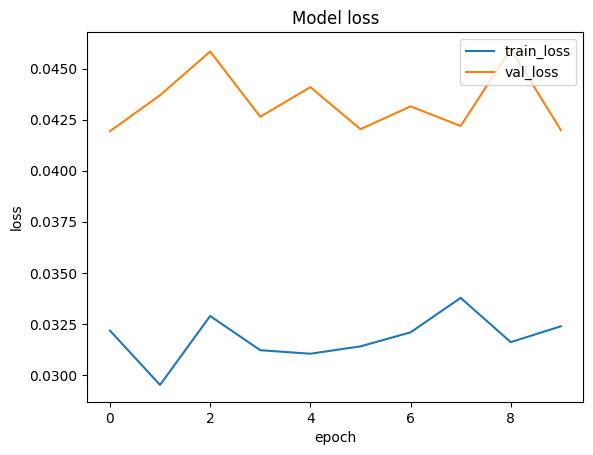

In [122]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()


In [56]:
len(yhat)

8787

In [133]:
yhatann =  np.argmax(yhat, axis=1)
yann= pd.DataFrame(yhatann)
yann.columns=['Class']
yann['Class']
yann.value_counts()
# pd.DataFrame(y_test).value_counts()
# confusion_matrix(y_test, yann['Class'], "Confusion Matrix for ANN")


Class
0        8787
dtype: int64

In [146]:
# pd.DataFrame(yhat).to_csv('yhat.csv')

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
yhat= xgb.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.12%


In [66]:
xgb.score(x_test, y_test)

0.9811639700555421

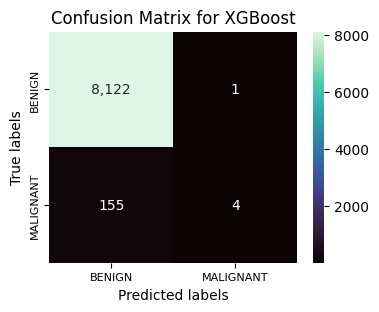

In [67]:
yhat= xgb.predict(x_test)
plot_confusion_matrix(y_test,yhat, 'Confusion Matrix for XGBoost')

In [68]:
# y_test.value_counts()

0    8123
1     159
Name: target, dtype: int64

In [70]:

# plot_roc_curve(y_test, yhat)

In [71]:
from lightgbm import LGBMClassifier

In [90]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.03, class_weight='balanced')
model.fit(x_train, y_train)

# Predicting the Target variable
pred = model.predict(x_test)
# print(pred)
accuracy = model.score(x_test, y_test)
print(accuracy)
cm=confusion_matrix(y_test, pred)
print(cm)


0.8531755614585849
[[6990 1133]
 [  83   76]]


In [91]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
# from sklearn.m import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
# define the model
model = AdaBoostClassifier()
# evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(
#     model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [92]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9809224824921516

In [93]:
yhat=model.predict(x_test)
cm=confusion_matrix(y_test, yhat)
cm

array([[8122,    1],
       [ 157,    2]], dtype=int64)

# TODO

gbm
catboost

logistic regression
svm 